In [1]:
from keras.datasets import mnist
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

2023-04-13 06:10:35.889753: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-13 06:10:36.004291: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-13 06:10:36.038880: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-13 06:10:37.216012: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [3]:
#클러스터 별로 arm 갯수 확인해보기
Sum_of_squared_distances = []
K = range(1,11)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(x_train)
    Sum_of_squared_distances.append(kmeans.inertia_)

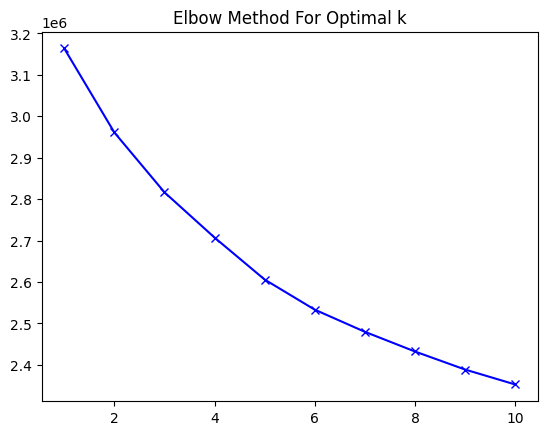

In [4]:
import matplotlib.pyplot as plt
plt.plot(K,Sum_of_squared_distances,'bx-')
# plt.xlabel(‘Values of K’) 
# plt.ylabel(‘Sum of squared distances/Inertia’) 
plt.title('Elbow Method For Optimal k')
plt.show()

In [5]:
kmeans.predict(x_test)

array([9, 7, 5, ..., 9, 9, 6], dtype=int32)

In [6]:
def viz_img(y_pred):
    n = 10
    fig = plt.figure(1)
    box_index = 1
    for cluster in range(10):
        result = np.where(y_pred == cluster)
        for i in np.random.choice(result[0].tolist(), n, replace=False):
            ax = fig.add_subplot(n, n, box_index)
            plt.imshow(x_train[i].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            box_index += 1
    plt.show()

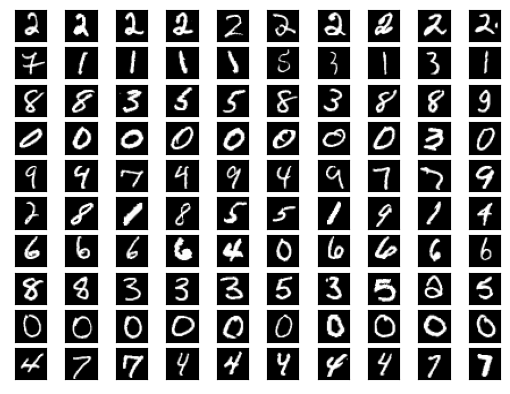

In [7]:
viz_img(kmeans.labels_)